In [2]:
# import
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
import matplotlib.gridspec as gridspec

In [3]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [4]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for folder in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if folder == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif folder == 'sea':
            label = 4
        elif folder == 'buildings':
            label = 0
        elif folder == 'forest':
            label = 1
        elif folder == 'street':
            label == 5
        elif folder == 'mountain':
            label == 3
            
        
        
        for file in os.listdir(directory + "/" + folder): #Extracting the file name of the image from Class Label folder
            img_path = directory + "/" + folder + "/" + file
            image = cv2.imread(img_path) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels) #Shuffle the dataset you just prepared.

In [5]:
class_names_label = {'mountain': 3,
                    'street' : 5,
                    'glacier' : 2,
                    'buildings' : 0,
                    'sea' : 4,
                    'forest' : 1
                    }
def get_images(directory):
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """
    
    size = (150,150)
    output = []
    images = []
    labels = []
    for folder in os.listdir(directory):
        curr_label = class_names_label[folder]
        for file in os.listdir(directory + "/" + folder):
            img_path = directory + "/" + folder + "/" + file
            curr_img = cv2.imread(img_path)
            curr_img = cv2.resize(curr_img, size)
            images.append(curr_img)
            labels.append(curr_label)
    images, labels = shuffle(images, labels)     ### Shuffle the data !!!
    images = np.array(images, dtype = 'float32') ### Our images
    labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        

    return images, labels

In [6]:
Images, Labels = get_images('./seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [15]:
np.where(Labels == 4)

(array([    1,     4,    16, ..., 14029, 14031, 14033]),)

In [8]:
Images = np.array(Images)/255.0

In [9]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Labels: (14034,)


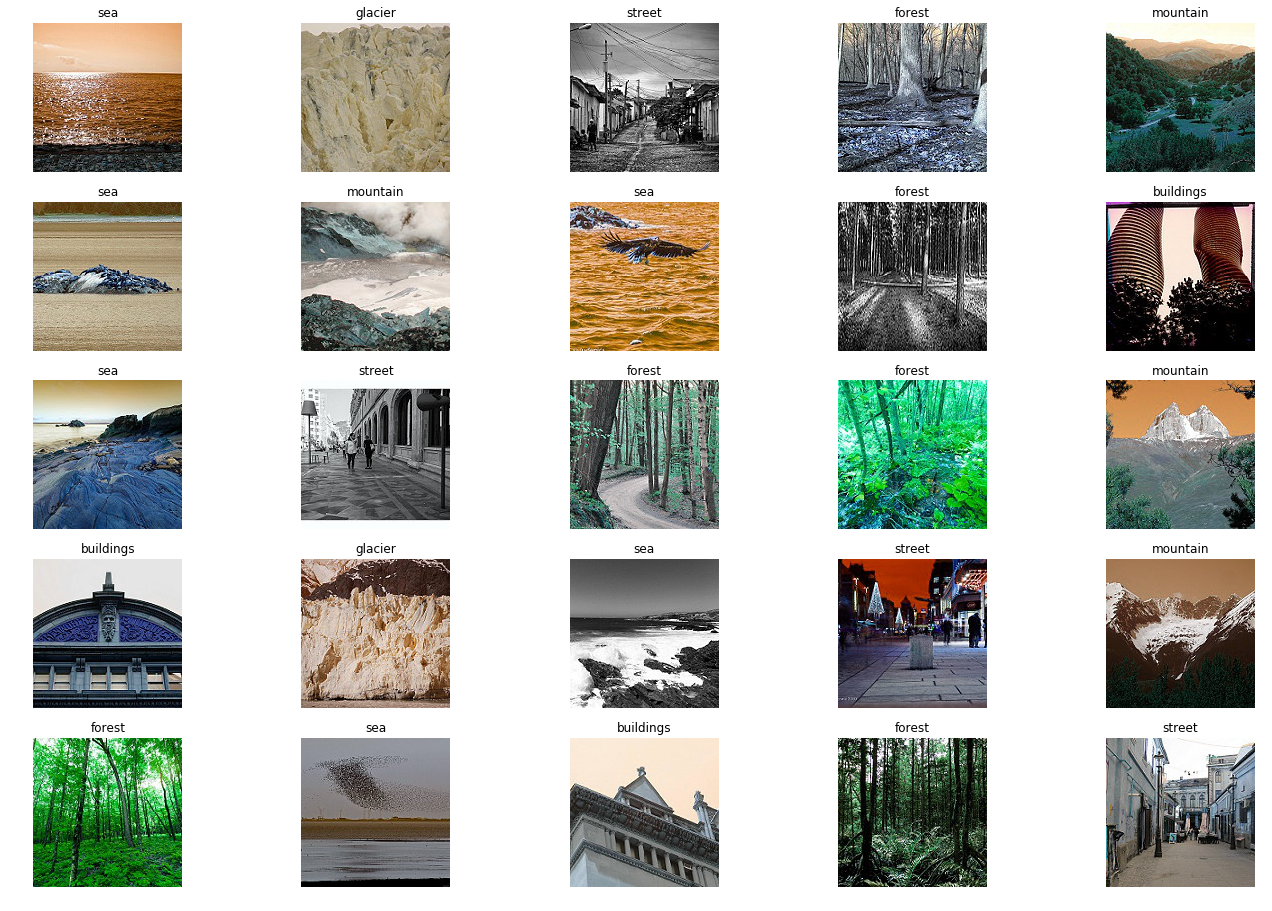

In [10]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')


In [63]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [64]:
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 21, 21, 50)        45050     
__________

In [65]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30) #50epoch

Train on 9823 samples, validate on 4211 samples
Epoch 1/35
9823/9823 [==============================] - 56s 6ms/step - loss: 1.4431 - acc: 0.3969 - val_loss: 1.0876 - val_acc: 0.5785
Epoch 2/35
9823/9823 [==============================] - 55s 6ms/step - loss: 1.1756 - acc: 0.5293 - val_loss: 0.9976 - val_acc: 0.5956
Epoch 3/35
9823/9823 [==============================] - 55s 6ms/step - loss: 1.0800 - acc: 0.5756 - val_loss: 0.8909 - val_acc: 0.6421
Epoch 4/35
9823/9823 [==============================] - 55s 6ms/step - loss: 0.9647 - acc: 0.6281 - val_loss: 0.7747 - val_acc: 0.7257
Epoch 5/35
9823/9823 [==============================] - 54s 6ms/step - loss: 0.8486 - acc: 0.6922 - val_loss: 0.6873 - val_acc: 0.7540
Epoch 6/35
9823/9823 [==============================] - 54s 6ms/step - loss: 0.7753 - acc: 0.7287 - val_loss: 0.6067 - val_acc: 0.7808
Epoch 7/35
9823/9823 [==============================] - 54s 6ms/step - loss: 0.7150 - acc: 0.7513 - val_loss: 0.5631 - val_acc: 0.7979
Epoch 8

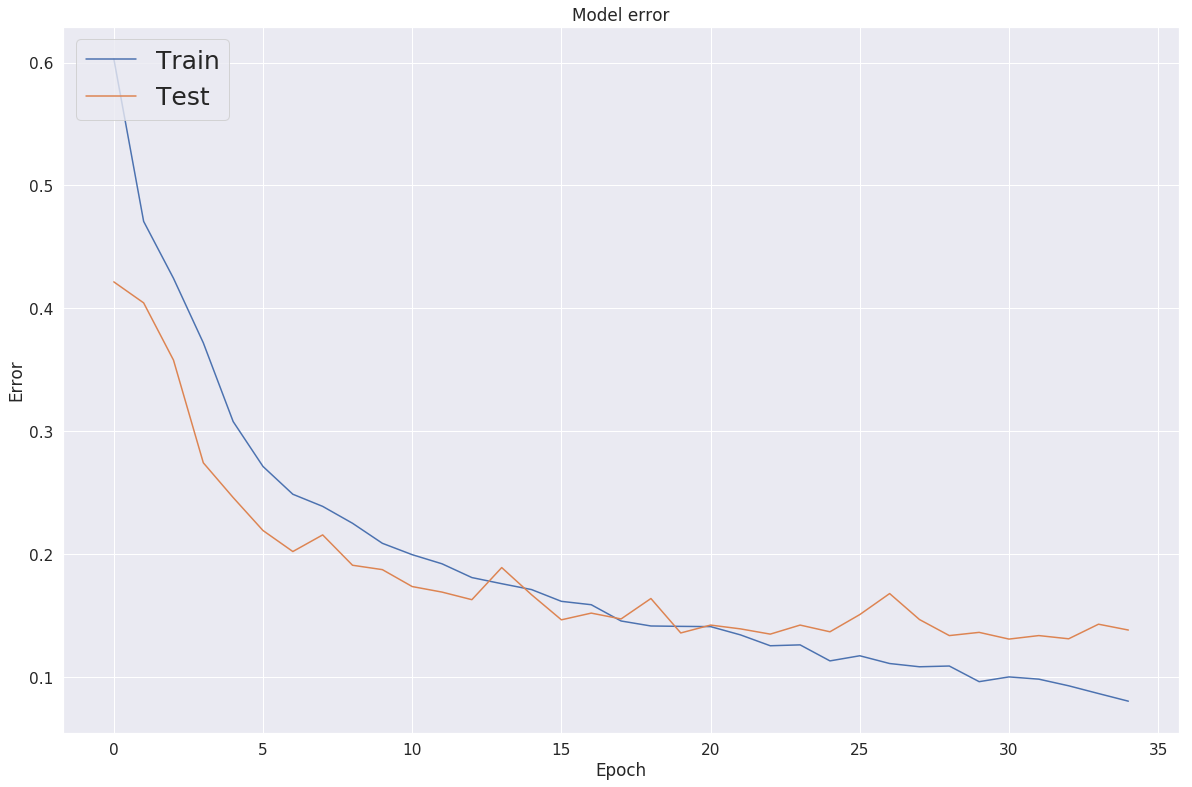

In [147]:
# plot.plot(trained.history['acc'])
# plot.plot(trained.history['val_acc'])
# plot.title('Model accuracy')
# plot.ylabel('Accuracy')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

plot.figure(figsize=(20,13))
plot.plot(np.ones(len(trained.history['acc']))-np.array(trained.history['acc']))
plot.plot(np.ones(len(trained.history['val_acc']))-np.array(trained.history['val_acc']))
plot.title('Model error')
plot.ylabel('Error')
plot.xlabel('Epoch')
plot.grid(True)
plot.legend(['Train', 'Test'], loc='upper left',prop = {'size':25})
# plot.savefig('CNNmodelerror.jpg') 
plot.show()


# plot.plot(trained.history['acc'])
# plot.plot(trained.history['val_acc'])
# plot.title('Model accuracy')
# plot.ylabel('Acc')
# plot.xlabel('Epoch')
# plot.legend(['Train', 'Test'], loc='upper left')
# plot.show()

In [67]:
test_images,test_labels = get_images('./seg_test/') #45 epch  86  #50
test_images = np.array(test_images)/255.0
test_labels = np.array(test_labels)
model.evaluate(test_images,test_labels, verbose=1)

3000/3000 [==============================] - 5s 2ms/step


[0.4555780518054962, 0.8659999998410542]

In [30]:
# import zipfile
# zip_ref2 = zipfile.ZipFile('seg_pred.zip', 'r')
# zip_ref2.extractall()
# zip_ref2.close()

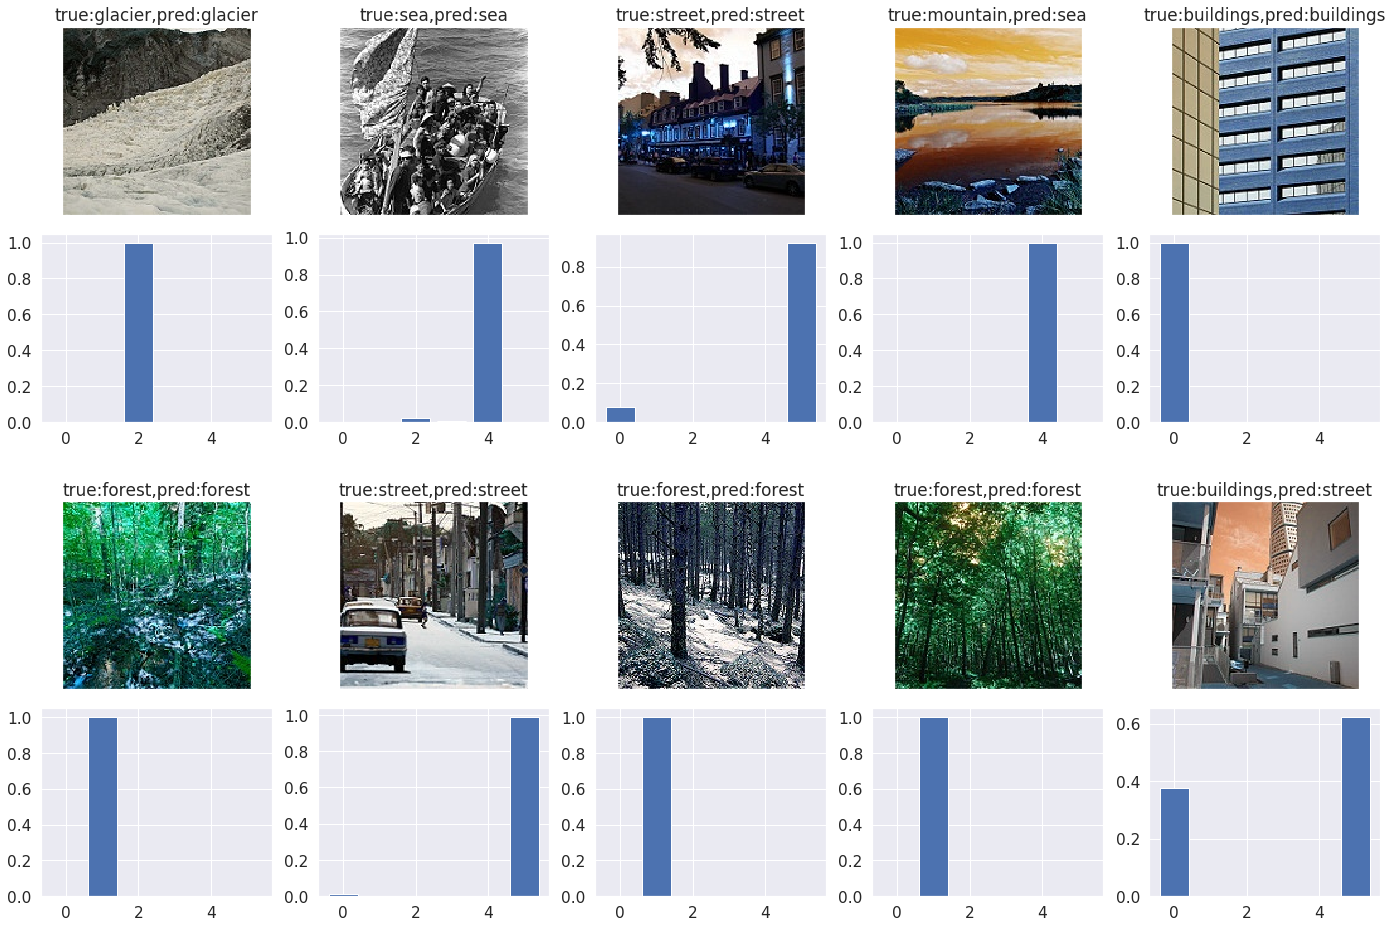

In [133]:
fig = plot.figure(figsize=(24, 16))
outer = gridspec.GridSpec(2, 5, wspace=0.2, hspace=0.2)

for i in range(10):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(test_images))
    test_image = np.array([test_images[rnd_number]])
    pre_labels = model.predict(test_image)
    pred_prob = pre_labels.reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(test_image[0])
            ax.set_title('true:{},pred:{}'.format(get_classlabel(test_labels[rnd_number]),get_classlabel(int(np.argmax(pre_labels, axis = 1)))))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


In [100]:
fig.savefig('cnnpreep.jpg')

In [69]:
pre_labels = model.predict(test_images)

In [70]:
pre_labels = np.argmax(pre_labels, axis = 1)

In [ ]:
pre_labels

In [ ]:
np.where(Labels==3)

In [ ]:
len(Images), len(Labels),len(_labels)

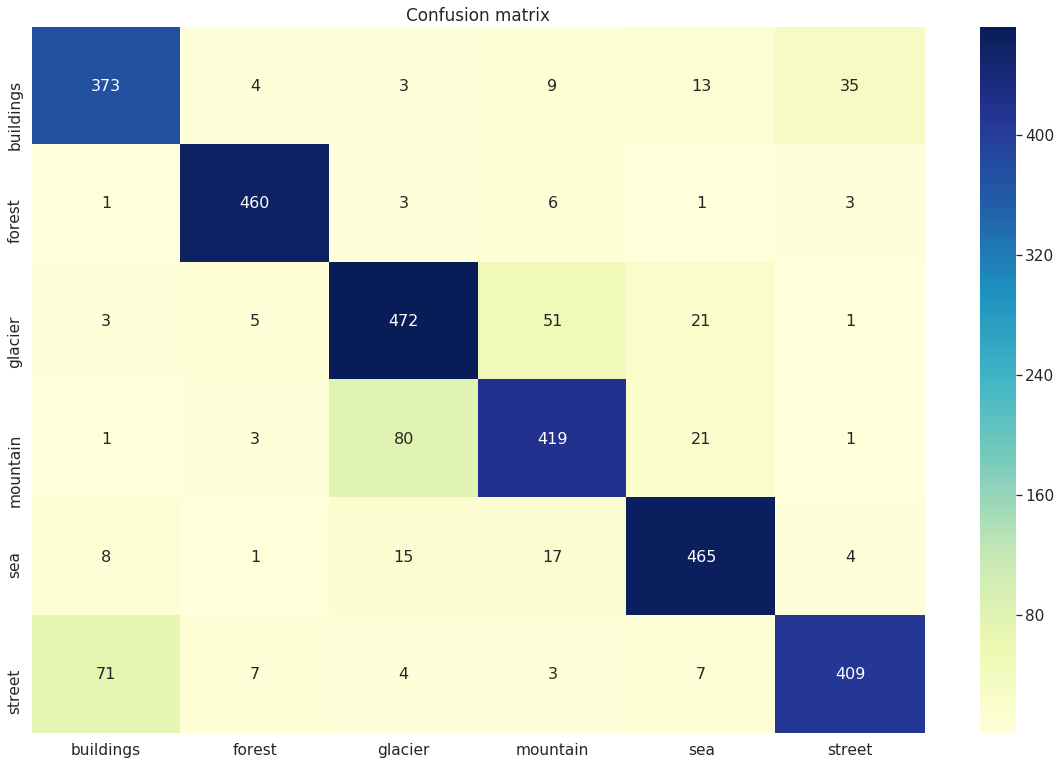

In [73]:
from sklearn.metrics import confusion_matrix# confusion matrix to carry out error analysis
import seaborn as sn 

class_names = ['buildings','forest', 'glacier','mountain', 'sea' ,'street' ]
CM = confusion_matrix(test_labels, pre_labels,labels=np.arange(6))
plot.figure(figsize=(20,13))
ax = plot.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax, fmt="d",cmap="YlGnBu")
ax.set_title('Confusion matrix')
plot.savefig('CNN_CM.jpg') # bbox_inches='tight'
plot.show()

In [72]:
plot.savefig('CNN_CM.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()


In [20]:
import shutil

shutil.rmtree('./seg_train')

In [21]:
shutil.rmtree('./seg_test')

In [22]:

import zipfile
zip_ref = zipfile.ZipFile('seg_train.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [24]:
zip_ref1 = zipfile.ZipFile('seg_test.zip', 'r')
zip_ref1.extractall()
zip_ref1.close()

In [ ]:
zip_ref2 = zipfile.ZipFile('seg_pred.zip', 'r')
zip_ref2.extractall()
zip_ref2.close()

In [103]:
Images.shape
Labels.shape

(14034,)

##  RF

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 150)
Images_rf = Images.reshape(Labels.shape[0],-1)
rf.fit(Images_rf, Labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [120]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = test_images[index]
img_flatten = img.reshape(1,-1)
predictions = rf.predict(img_flatten)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[predictions[pred_img]]
true_label = class_names[test_labels[index]] 

In [ ]:
title = 'Pred : {} VS True : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

In [123]:
test_images_flatten = test_images.reshape(test_labels.shape[0],-1)
predictions = rf.predict(test_images_flatten)
predictions1 = rf.predict(Images.reshape(Labels.shape[0],-1))
pred_labels = predictions
# print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

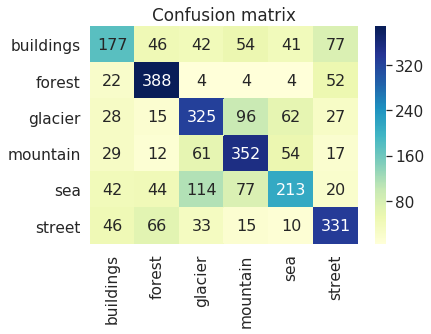

In [131]:
plot.figure(figsize=(20,13))
CM = confusion_matrix(test_labels, pred_labels)
ax = plot.axes()
sn.set(font_scale=1.4)
sn.heatmap(CM, annot=True,annot_kws={"size": 16},  xticklabels=class_names, yticklabels=class_names, ax = ax, fmt='d',cmap='YlGnBu')
ax.set_title('Confusion matrix')
plot.savefig('RF_CM.jpg') # bbox_inches='tight'
plot.show()

In [124]:
from sklearn.metrics import mean_squared_error
print(f"MSE: {mean_squared_error(predictions,test_labels)}")
print(f"MSE: {mean_squared_error(predictions1,Labels)}")

MSE: 3.197
MSE: 0.005842952828844236


In [125]:
rf.score(test_images_flatten,test_labels)

0.5953333333333334

In [126]:
rf.score(Images.reshape(Labels.shape[0],-1),predictions1)

1.0

In [148]:
a = np.ones(len(trained.history['acc']))-np.array(trained.history['acc'])

In [149]:
b = np.ones(len(trained.history['val_acc']))-np.array(trained.history['val_acc'])

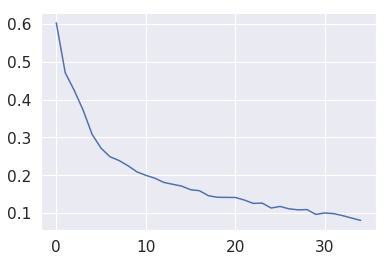

In [151]:
plot.plot(a)